# Лабораторная работа 6.

### Создаю свой датафрейм

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Создаем датафрейм с 1000 строками:
df = pd.DataFrame({
    'Тип товара': np.random.choice(['Ноутбук', 'Планшет', 'Смартфон', 'Системный блок'], size=1000),
    'Цена': np.round(np.random.uniform(2500, 120000, size=1000), 2),
})

# Генерируем случайные значения от 0 до 1:
random_values = np.random.binomial(n=1, p=0.5, size=1000)

# Присваиваем 1 в тех случаях, где значение > 0 и 0 в противном случае:
df['Количество на складе'] = [value if random_values[i] == 0 else np.random.randint(1, 5000) for i, value in enumerate(random_values)]

# Добавляем столбец "Наличие на складе" по условию:
df['Наличие на складе'] = df['Количество на складе'] != 0

# Сохраняем результат в csv файл:
df.to_csv('products.csv', index=False)

### 1.1 Постройте любой график с помощью чистого matplotlib / pylab

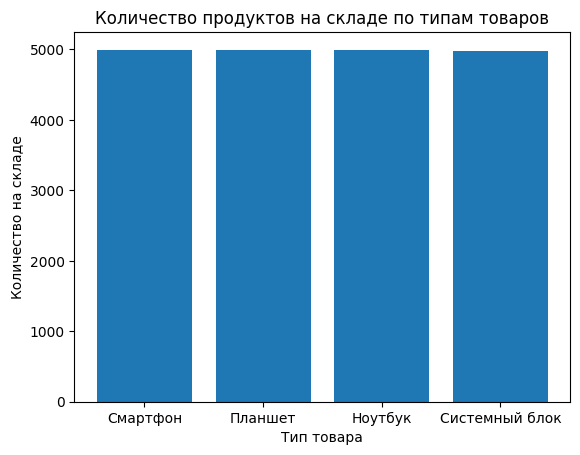

In [2]:
df = pd.read_csv('products.csv')
plt.bar(df['Тип товара'], df['Количество на складе'])
plt.xlabel('Тип товара')
plt.ylabel('Количество на складе')
plt.title('Количество продуктов на складе по типам товаров')
plt.show()

### 1.2 Постройте несколько суб-графиков на одном графике используя .subplot

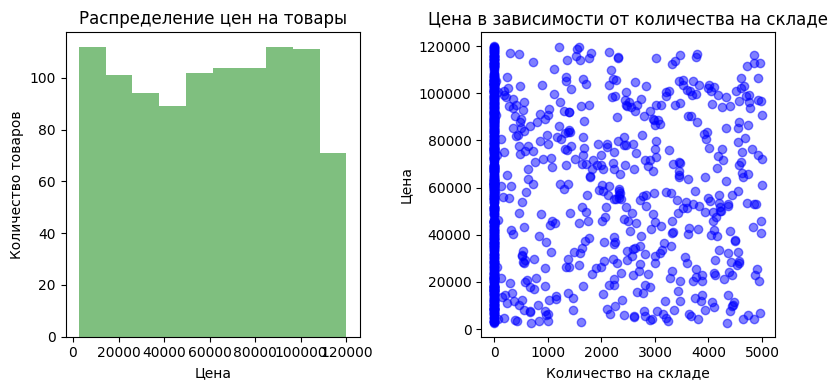

In [3]:
fig = plt.figure(figsize=(8, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.hist(df['Цена'], color='green', alpha=0.5)
plt.xlabel('Цена')
plt.ylabel('Количество товаров')
plt.title('Распределение цен на товары')

# subplot 2
plt.subplot(1, 2, 2)
plt.scatter(df['Количество на складе'], df['Цена'], color='blue', alpha=0.5)
plt.xlabel('Количество на складе')
plt.ylabel('Цена')
plt.title('Цена в зависимости от количества на складе')

plt.tight_layout()
plt.show()

### 2.1 Постройте три разных графика с помощью pandas.DataFrame.plot / Series.plot

#### 1) Ящик с усами для цен товаров, сгруппированных по типам товаров

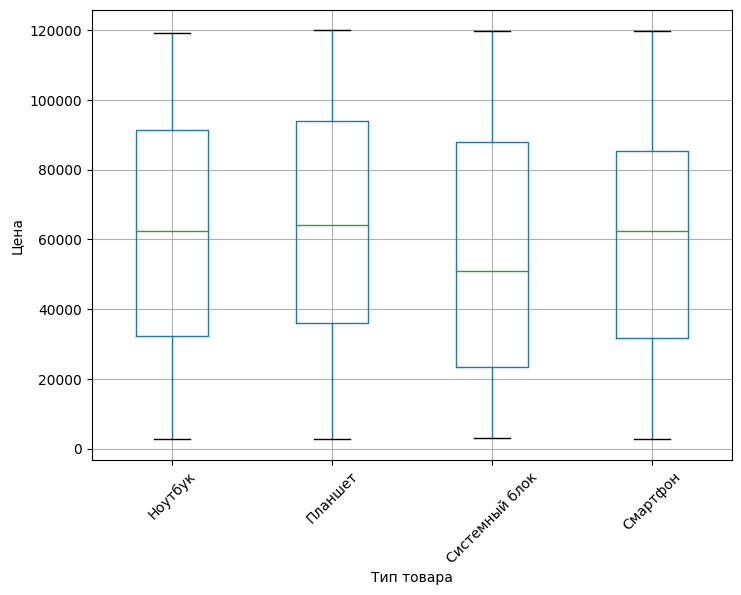

In [4]:
df.boxplot(column='Цена', by='Тип товара', figsize=(8, 6))
plt.title('')
plt.suptitle('')
plt.xlabel('Тип товара')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

#### 2) Гистограмму распределения цен на товары

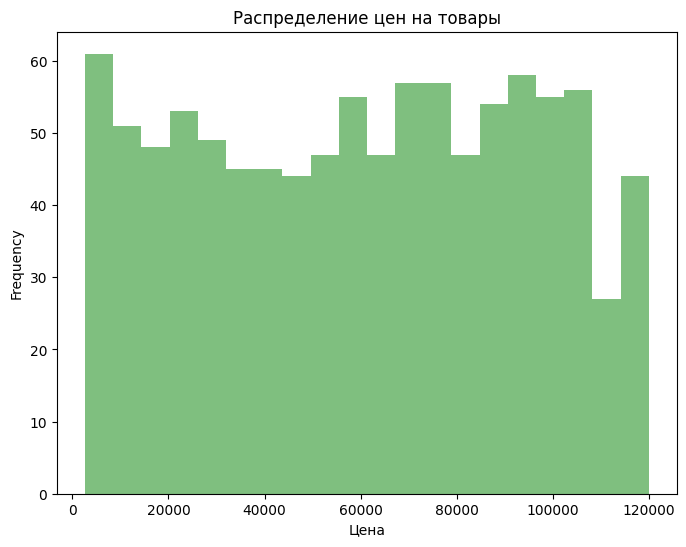

In [5]:
plt.figure(figsize=(8, 6))
df['Цена'].plot(kind='hist', bins=20, alpha=0.5, color='green')
plt.xlabel('Цена')
plt.title('Распределение цен на товары')
plt.show()

#### 3) Scatter plot зависимости цены от количества продуктов на складе

<Figure size 800x600 with 0 Axes>

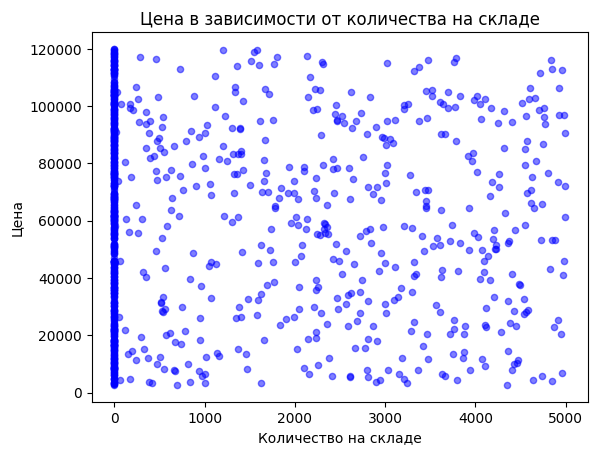

In [6]:
plt.figure(figsize=(8, 6))
df.plot(kind='scatter', x='Количество на складе', y='Цена', alpha=0.5, color='blue')
plt.xlabel('Количество на складе')
plt.ylabel('Цена')
plt.title('Цена в зависимости от количества на складе')
plt.show()

### 2.2 Постройте три разных графика с помощью методов DataFrame и Series

#### 1) Гистограмма распределения цен на товары, через Series

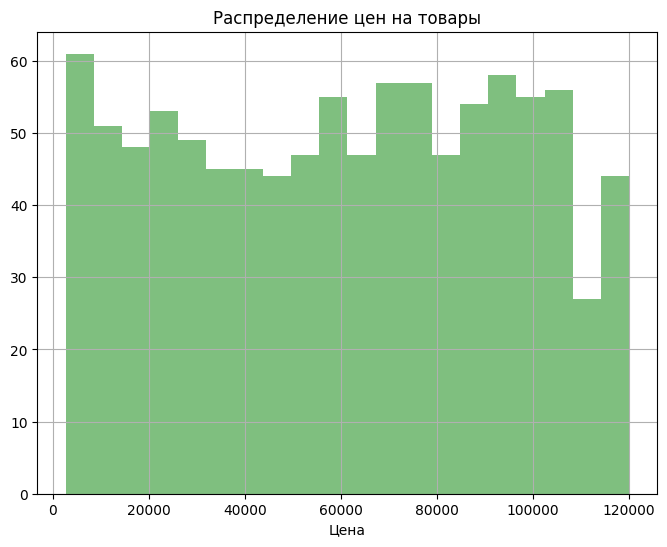

In [7]:
plt.figure(figsize=(8, 6))
df['Цена'].hist(bins=20, alpha=0.5, color='green')
plt.xlabel('Цена')
plt.title('Распределение цен на товары')
plt.show()

#### 2) Scatter plot зависимости цены от количества продуктов на складе, через DataFrame

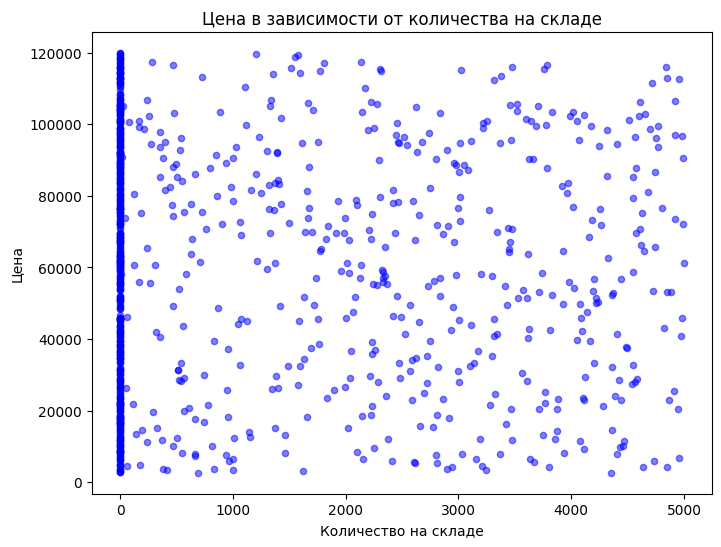

In [8]:
df.plot(kind='scatter', x='Количество на складе', y='Цена', alpha=0.5, color='blue', figsize=(8, 6))
plt.xlabel('Количество на складе')
plt.ylabel('Цена')
plt.title('Цена в зависимости от количества на складе')
plt.show()

### 3.1 Постройте .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

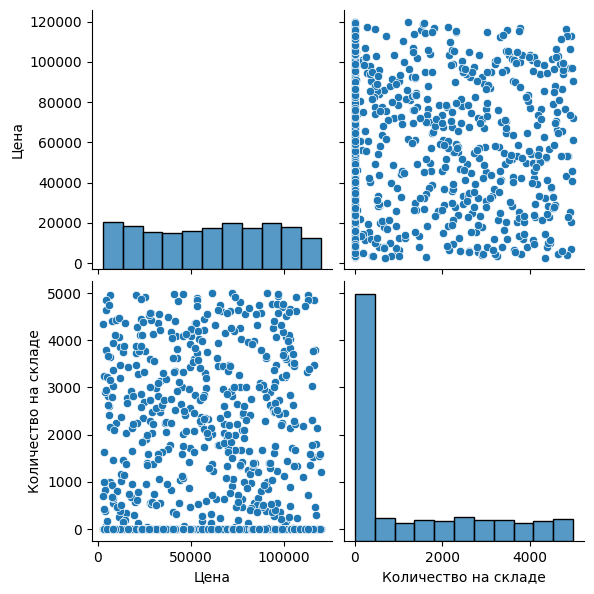

In [9]:
sns.pairplot(df[['Цена', 'Количество на складе']], height=3)
plt.show()

### 3.2 Постройте .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

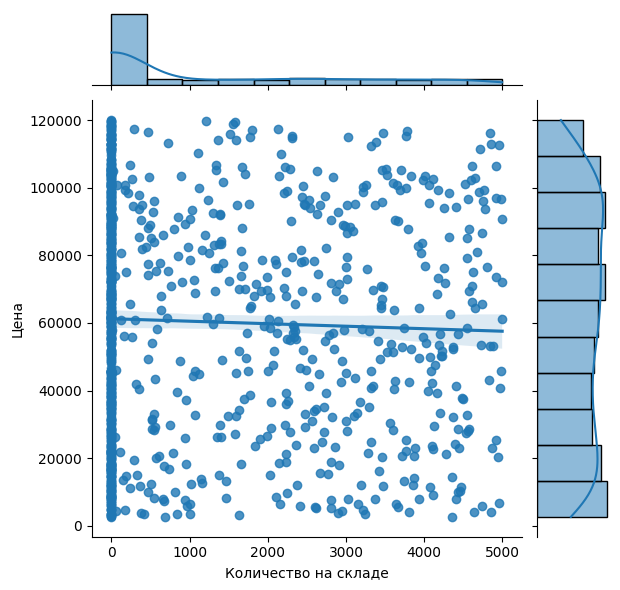

In [10]:
sns.jointplot(x='Количество на складе', y='Цена', data=df, kind='reg')
plt.show()

### 3.3 Постройте .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

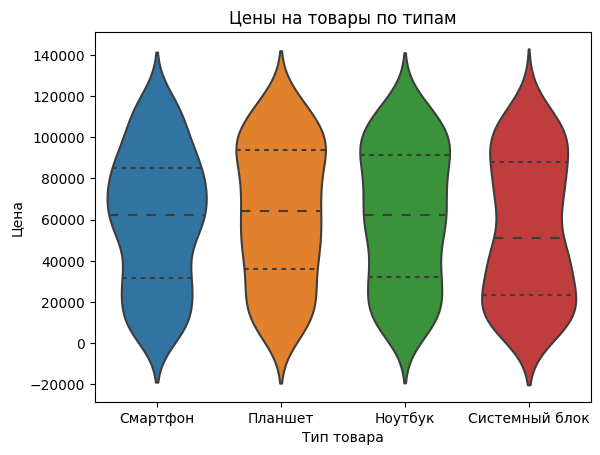

In [11]:
sns.violinplot(x='Тип товара', y='Цена', data=df, inner='quartile')
plt.xlabel('Тип товара')
plt.ylabel('Цена')
plt.title('Цены на товары по типам')
plt.show()

### 3.4 Постройте график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

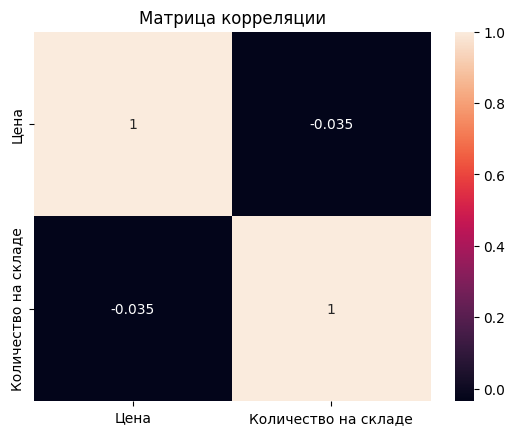

In [12]:
sns.heatmap(df[['Цена', 'Количество на складе']].corr(), annot=True)
plt.title('Матрица корреляции')
plt.show()

### Постройте любой график (связанный с вашими данными) с помощью plotly

In [13]:
fig = px.scatter(df, x='Цена', y='Количество на складе', color='Тип товара', hover_data=['Наличие на складе'])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed